In [1]:
import os
import sys
import time
import sqlite3
from Functions.database import createTable
import tensorboard as tf

import matplotlib.pyplot as plt

from envConfig import CONFIG
CONFIG["PACKAGE_NAME"] = os.path.join(CONFIG["OUTPUTDATAPATH"], "Classification")

from Functions.FunctionsDataVisualization import hist_csv, plotLOFARgram, plotConfusionMatrix, distOutputLayer
from Functions.FunctionsDataVisualization import snsConfusionMatrix, savefig


import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.metrics import confusion_matrix
from lps_toolbox.metrics.classification import sp_index

analysis_name = 'Classification'

data_path = CONFIG['OUTPUTDATAPATH']
results_path = CONFIG['PACKAGE_NAME']


#db = sqlite3.connect(results_path+'classification.db')
#time = time.strftime("%a, %d %b %Y %H:%M:%S", time.gmtime())

Using TensorFlow backend.


In [2]:
from Functions.dataset.shipClasses import LoadData

dt_24 = LoadData(dev=False)
#dt_24.infoData()
all_data,all_trgt= dt_24.getData()

[+] Time to read data file: 3.93011593819 seconds


In [96]:
name = 'AB'

folder = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/'
folder_folds = folder + 'estimator_{0}/'.format(name)
if name=='super':
    name = 'S'
file = folder_folds + 'hierarq_analy_{0}_estimator.csv'.format(name)


In [97]:
def pred_true_df(df_tabela,ifold,colum=None):
   
    if colum is "wta":
        pred = df_tabela['ClassEspe_WTA(resultados)_{0}'.format(ifold)].values
    else:
        pred = df_tabela[u'HierarqNet(resultados)_{0}'.format(ifold)].values
    target = df_tabela['target_0'].values
    
    return pred, target


def recall_df(df_tabela,ifold,colum=None):
    pred, trgt = pred_true_df(df_tabela,ifold,colum)
    
    return recall_score(y_true=true,y_pred=pred,average=None)

def SP_df(df_tabela,ifold,colum=None):
    #pred_wta = df_tabela[df_tabela['fold_{0}'.format(ifold)]==1]['ClassEspe_WTA(resultados)_{0}'.format(ifold)].values
    #target = df_tabela[df_tabela['fold_{0}'.format(ifold)]==1]['target'].values
    
    pred, trgt = pred_true_df(df_tabela,ifold,colum)
    
    return sp_index(y_pred=pred,y_true=trgt)


Index([u'index', u'HierarqNet(resultados)_0', u'HierarqNet(valor)_0',
       u'fold_0', u'target_0', u'HierarqNet(resultados)_1',
       u'HierarqNet(valor)_1', u'fold_1', u'target_1',
       u'HierarqNet(resultados)_2', u'HierarqNet(valor)_2', u'fold_2',
       u'target_2', u'HierarqNet(resultados)_3', u'HierarqNet(valor)_3',
       u'fold_3', u'target_3', u'HierarqNet(resultados)_4',
       u'HierarqNet(valor)_4', u'fold_4', u'target_4',
       u'HierarqNet(resultados)_5', u'HierarqNet(valor)_5', u'fold_5',
       u'target_5', u'HierarqNet(resultados)_6', u'HierarqNet(valor)_6',
       u'fold_6', u'target_6', u'HierarqNet(resultados)_7',
       u'HierarqNet(valor)_7', u'fold_7', u'target_7',
       u'HierarqNet(resultados)_8', u'HierarqNet(valor)_8', u'fold_8',
       u'target_8', u'HierarqNet(resultados)_9', u'HierarqNet(valor)_9',
       u'fold_9', u'target_9'],
      dtype='object')


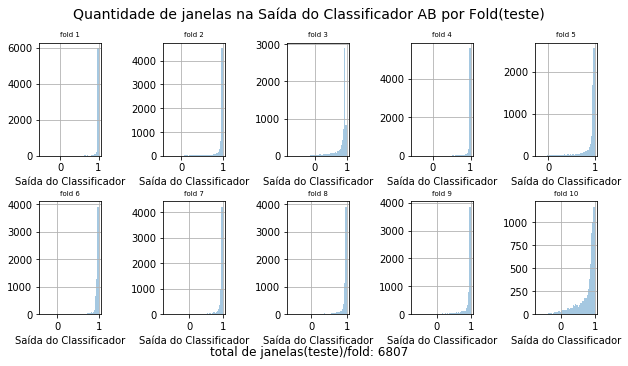

In [98]:
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

df = pd.read_csv(file)
print df.columns

fig = plt.figure(figsize=(10,5))
nbins = 20
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.4)
fig.suptitle(u"Quantidade de janelas na Saída do Classificador {0} por Fold(teste)".format(name), fontsize=14)
fig.text(0.5, 0.01, 'total de janelas(teste)/fold: {0}'.format(df[df['fold_{0}'.format(0)]==1].shape[0]), ha='center',fontsize=12,)
for idx in range(10):
    ax = plt.subplot(2,5, idx+1)
    sns.distplot(df[df['fold_{0}'.format(idx)]==1][u'HierarqNet(valor)_{0}'.format(idx)].values,ax=ax,kde=False)#,bins=20)
    ax.grid()
    plt.title('fold {0}'.format(idx+1),fontsize=7)
    #if (idx==0) | (idx==5):
        #plt.ylabel(u'Densidade')
    
    plt.xlabel(u'Saída do Classificador')
    
    plt.savefig(folder_folds+'distribution_{0}_10folds.png'.format(name),
                bbox_inches = 'tight',
                pad_inches = 0)

In [74]:
df.head()

,index,HierarqNet(resultados)_0,HierarqNet(valor)_0,fold_0,target_0,HierarqNet(resultados)_1,HierarqNet(valor)_1,fold_1,target_1,HierarqNet(resultados)_2,...,fold_7,target_7,HierarqNet(resultados)_8,HierarqNet(valor)_8,fold_8,target_8,HierarqNet(resultados)_9,HierarqNet(valor)_9,fold_9,target_9
0,12661,0,0.973657,1,0,0,0.946052,0,0,0,...,0,0,0,0.954789,0,0,0,0.981510,0,0
1,12662,0,0.976453,1,0,0,0.963984,0,0,0,...,0,0,0,0.889564,0,0,0,0.982128,0,0
2,12663,0,0.959363,1,0,0,0.864400,0,0,0,...,0,0,0,0.939918,0,0,0,0.974454,0,0
3,12664,0,0.971577,1,0,0,0.957983,0,0,0,...,0,0,0,0.924430,0,0,0,0.981996,0,0
4,12665,0,0.871121,1,0,0,0.953535,0,0,0,...,0,0,0,0.897398,0,0,0,0.981836,0,0


figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_AB/confusion_matrix_-1_1.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_AB/confusion_matrix_0.5_1.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_AB/confusion_matrix_0_0.5.png file


/home/venancio/sonarteste/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in divide


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

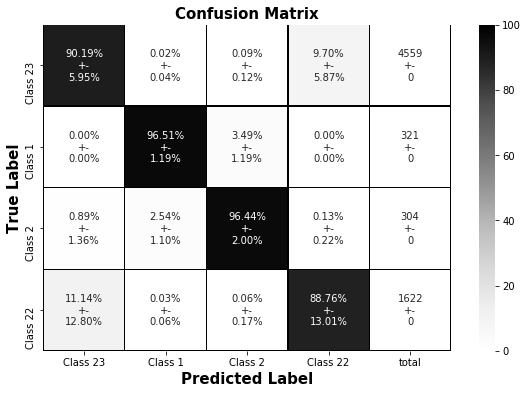

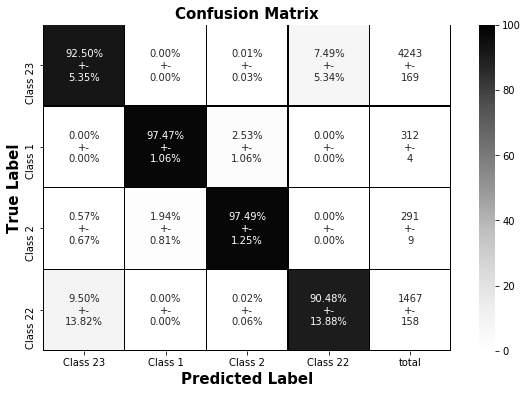

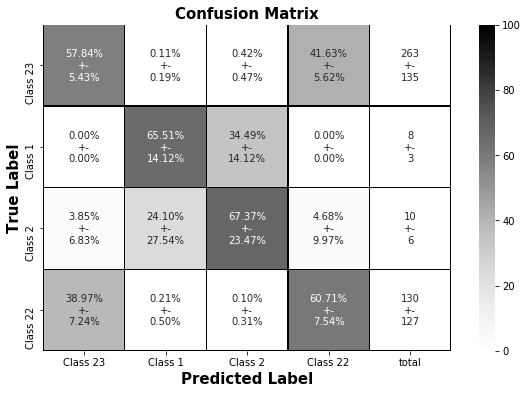

In [99]:
#params

classes = [23,1,2,22]
lim_sup = [1,1,0.5,0,-0.5]
lim_inf = [-1,0.5,0,-0.5,-1]
for limSup, limInf in zip(lim_sup,lim_inf):

    limiar_superior = limSup
    limiar_inferior = limInf

    label_y = ['Class {0}'.format(i) for i in classes]
    label_x = label_y + ['total']


    cm_folds=[]
    true_folds=[]
    for ifold in range(10):
        df_neg = df[(df[u'HierarqNet(valor)_{0}'.format(ifold)] <= limiar_superior) & (df[u'HierarqNet(valor)_{0}'.format(ifold)] >= limiar_inferior) & (df[u'fold_{0}'.format(ifold)] == 1)]
        pred, true = pred_true_df(df_neg,ifold)
        confusionMatrix = confusion_matrix(true, pred)
        true_folds.append(confusionMatrix.sum(axis=1))
        cm = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
        cm_folds.append(cm)
    
    cm_3 = np.array(cm_folds)
    cm_mean = cm_3.mean(axis=0)
    cm_std = cm_3.std(axis=0)

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.set_aspect(1)



    snsConfusionMatrix(cm_norm=cm_folds,ax=ax,total_col=true_folds,y_labels=label_y,x_labels=label_x)
    savefig(plt,folder_folds+'confusion_matrix_{0}_{1}.png'.format(limiar_inferior,limiar_superior))

# Histograma (saída de cada classe) X (Classe)

In [3]:
#classe A

name = 'DA'

class_folder = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_{0}'.format(name)
sp_file = class_folder + '/SP_folds.csv'

sp_values = pd.read_csv(sp_file).values

fold = np.argmax(sp_values)
print("Best Fold is {0} with sp:{1}".format(fold+1,sp_values[fold]))

fold_folder = class_folder + '/fold0{0}'.format(str(fold))
output_sparce_csv = fold_folder + '/output_sparce.csv'
hierarq_anal_csv = fold_folder + '/hierarq_analy_fold_{0}.csv'.format(str(fold))

# name = 'super'

# folder = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_32_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/'
# folder_folds = folder + 'estimator_{0}/'.format(name)
# if name=='super':
#     name = 'S'
# file = folder_folds + 'hierarq_analy_{0}_estimator.csv'.format(name)

Best Fold is 7 with sp:[0.99770222]


In [4]:
df_output = pd.read_csv(output_sparce_csv)#,names=['neuronio_{0}'.format(i) for i in range(3)])
#df_index = pd.DataFrame({'index':range(df_output.shape[0])})
#df_output = pd.concat([df_index,df_output],axis=1)


df_trgt = pd.read_csv(hierarq_anal_csv)
#df_trgt = pd.concat([df_index,df_trgt],axis=1)

#df_trgt = df_trgt[df_trgt['fold_5']==1]#['target_0'].values
#df_output = df_output[df_output['fold_{0}'.format(fold)]==1]
df_output.head()

,fold_6,neuron_0,neuron_1,neuron_2
0,0,0.969512,-0.965716,-0.955103
1,0,0.970963,-0.966681,-0.953776
2,0,0.976678,-0.959502,-0.926520
3,0,0.968748,-0.969627,-0.946230
4,0,0.967416,-0.960303,-0.956719


In [5]:
print df_classI.head()
print np.unique(df_trgtI)

NameError: name 'df_classI' is not defined

/home/venancio/sonarteste/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/venancio/sonarteste/lib/python2.7/site-packages/seaborn/distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/venancio/sonarteste/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_DA/output_matrix_0.5_1.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_DA/output_matrix_0_0.5.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_DA/output_matrix_-0.5_0.png file
figure was saved in /home/venancio/Workspace/SonarAnalysis/Resu

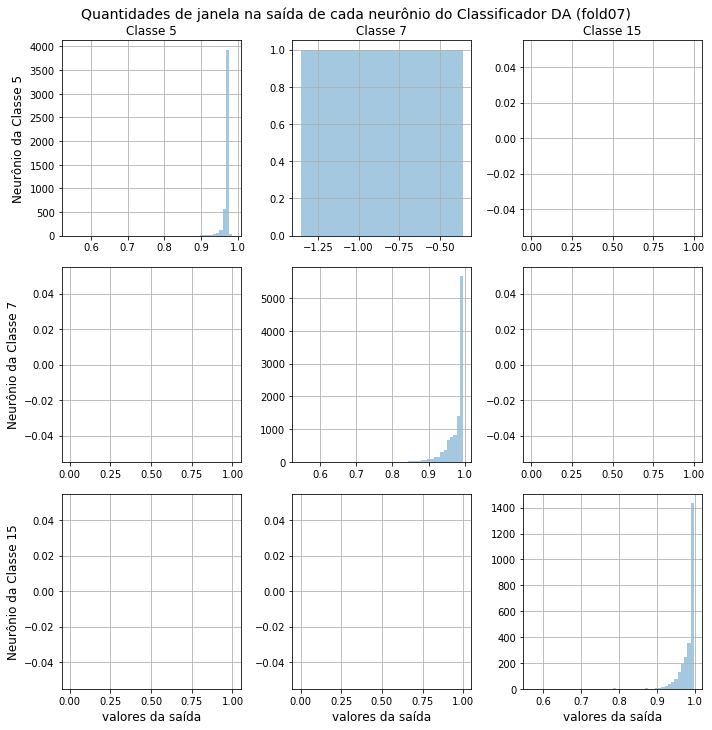

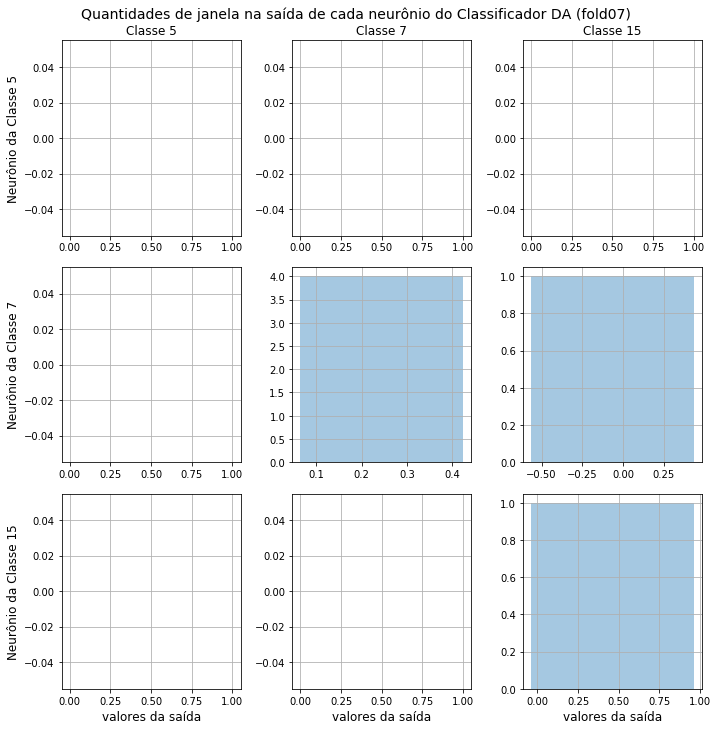

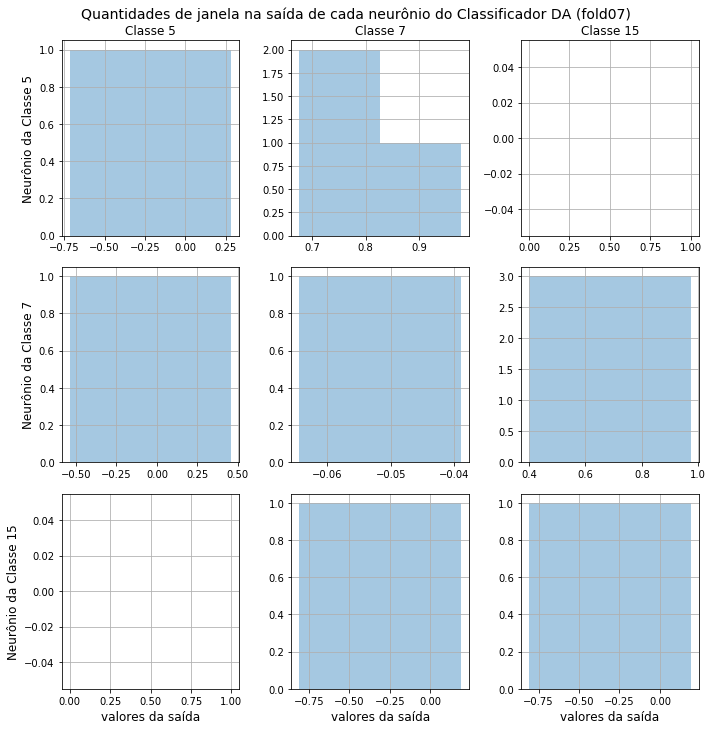

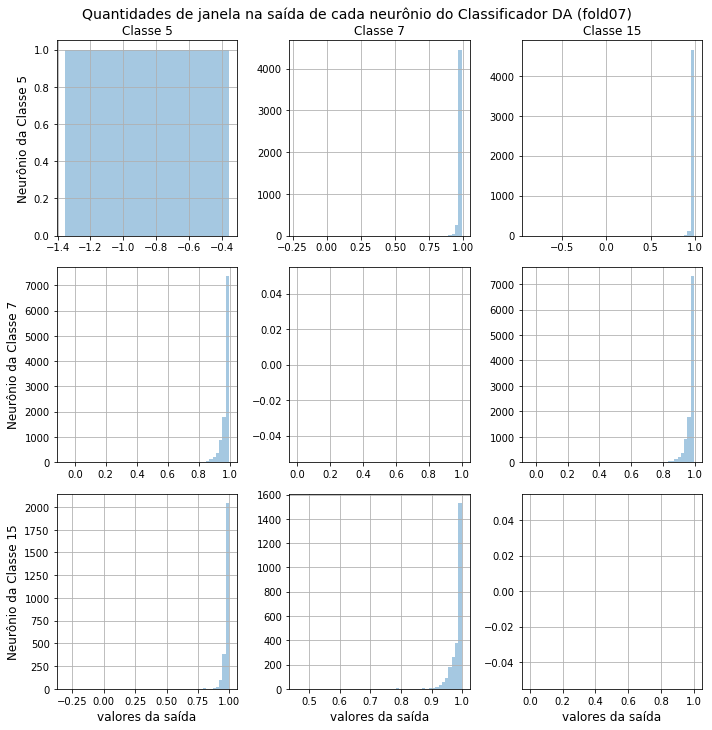

In [6]:
#Output of each neuron acoording to classes ("confusion matrix of output")

classes = [5,7,15]
lim_sup = [1,0.5,0,-0.5]
lim_inf = [0.5,0,-0.5,-1]
for limSup, limInf in zip(lim_sup,lim_inf):

    suptitle = u"Quantidades de janela na saída de cada neurônio do Classificador {0} (fold{1:02d})".format(name,fold+1)

    n_neurons = len(classes)

    fig = plt.figure(figsize=(10,10))
    fig.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=0.2)
    axes = fig.subplots(ncols=n_neurons,nrows=n_neurons)

    cols_label = [u'Classe {}'.format(col) for col in classes]
    rows_label = [u'Neurônio da Classe {}'.format(row) for row in classes]
    low_label = [u'valores da saída'.format(row+1) for row in range(n_neurons)]

    for icol in range(n_neurons):
        df_classI = df_output[(df_output['neuron_{0}'.format(icol)]>=limInf) & (df_output['neuron_{0}'.format(icol)]<=limSup)]
        df_classI_neurons= df_classI.values[:,1:]
        df_trgtI = df_trgt.iloc[df_classI.index,:]['target_{0}'.format(fold)].values
        
        for iclass in range(n_neurons):
            ax = axes[iclass,icol]#[iclass][icol]
            neuron_output = df_classI_neurons[:,iclass]
            values = neuron_output[df_trgtI==iclass]
            sns.distplot(values,ax=ax,kde=False)
            ax.grid()
    fig.suptitle(suptitle,fontsize=14,y=1.01)        

    for ax, col in zip(axes[0], cols_label):
        ax.set_title(col)

    for ax, row in zip(axes[:,0], rows_label):
        ax.set_ylabel(row, rotation=90, size='large')
    
    for ax, row in zip(axes[n_neurons-1,:], low_label):
        ax.set_xlabel(row, size='large')

    fig.tight_layout()
    savefig(plt,class_folder+'/output_matrix_{0}_{1}.png'.format(limInf,limSup))

In [7]:
values = df_output.values[:,1:]
true = df_trgt['target_{0}'.format(fold)].values

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_DA/hist_outputNeuronXclass_allFolds.png file


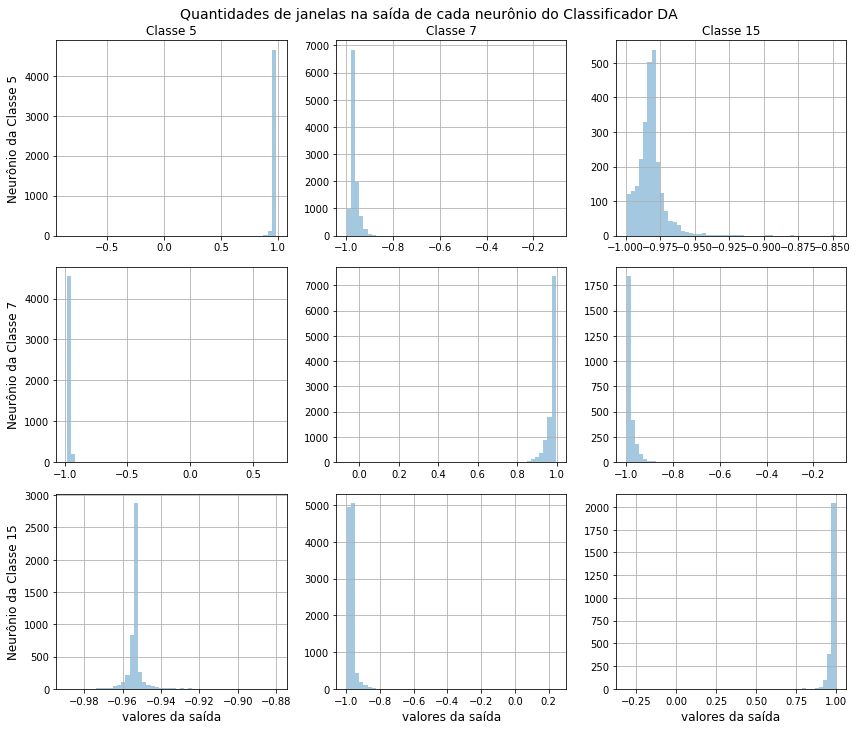

In [8]:
from scipy.stats import norm

#fig = plt.figure(figsize=(10,5))

#ax = plt.subplot(3,3, pos_plot+1)
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
# nbins = 20
# fig.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=0.4)
# #fig.suptitle(u"Distribuição da Saída do Classificador {0} por Fold".format(name), fontsize=14)

# cols = ['Class {}'.format(col) for col in ['AA','AB','AC']]
# rows = ['Neuron {}'.format(row) for row in range(1,4)]

# pos_plot = 0
# for n_col, icolumn in enumerate(df_output.columns):
#     for n_row, iclass in enumerate(np.unique(df_trgt)):
#         #ax = plt.subplot(3,3, pos_plot+1)
#         ax = axes[n_col][n_row]
#         neuron_output = df_output[icolumn].values
#         values = neuron_output[df_trgt==iclass]
#         sns.distplot(values,ax=ax,kde=False)
        
#         ax.grid()
#         pos_plot = pos_plot+1
        
# for ax, col in zip(axes[0], cols):
#     ax.set_title(col)

# for ax, row in zip(axes[:,0], rows):
#     ax.set_ylabel(row, rotation=90, size='large')
    
# fig.tight_layout()
classes = [5,7,15]

n_neurons = len(classes)

fig, axes = distOutputLayer(predict=values, trgt=true,figsize=(12,10),x_label= [u'valores da saída'.format(row+1) for row in range(n_neurons)],
                            cols_label=[u'Classe {}'.format(col) for col in classes],
                            rows_label=[u'Neurônio da Classe {}'.format(row) for row in classes],
                           suptitle=u"Quantidades de janelas na saída de cada neurônio do Classificador {0}".format(name),
                           suptitle_kwg={'fontsize':14,'y':1.01})


low_label = [u'valores da saída'.format(row+1) for row in range(n_neurons)]

savefig(fig,class_folder+'/hist_outputNeuronXclass_allFolds.png')

# Analise do Hieraq com batch size de 512 e critério de parada SP

In [76]:
name = 'DB'

n_folds = 10

folder = '/home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/'
folder_folds = folder + 'estimator_{0}/'.format(name)
if name=='super':
    name = 'S'
file = folder_folds + 'hierarq_analy_{0}_estimator.csv'.format(name)

In [77]:
log_folds = []
for ifold in range(n_folds):
    file_log = folder_folds + 'fold0{0}/'.format(ifold) + 'log_train.csv'
    mt_log = pd.read_csv(file_log)
    log_folds.append(mt_log)

figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_10_folds_10_neurons_adam_optmizer_True_balanced_mapstd_norm_1000_epochs_512_batch_size_tanh_hidden_activation_tanh_output_activation_acc_sp_metric_mean_squared_error_loss/estimator_DB/log_DB_metricSP.png file


,epoch,acc,loss,sp,val_acc,val_loss
0,1,0.826533,0.484990,0.970563,0.969543,0.196508
1,2,0.964946,0.164713,0.987090,0.986802,0.108327
2,3,0.971934,0.111266,0.988944,0.988832,0.072486
3,4,0.976555,0.083335,0.988583,0.988832,0.057871
4,5,0.980500,0.066578,0.988398,0.988832,0.050882


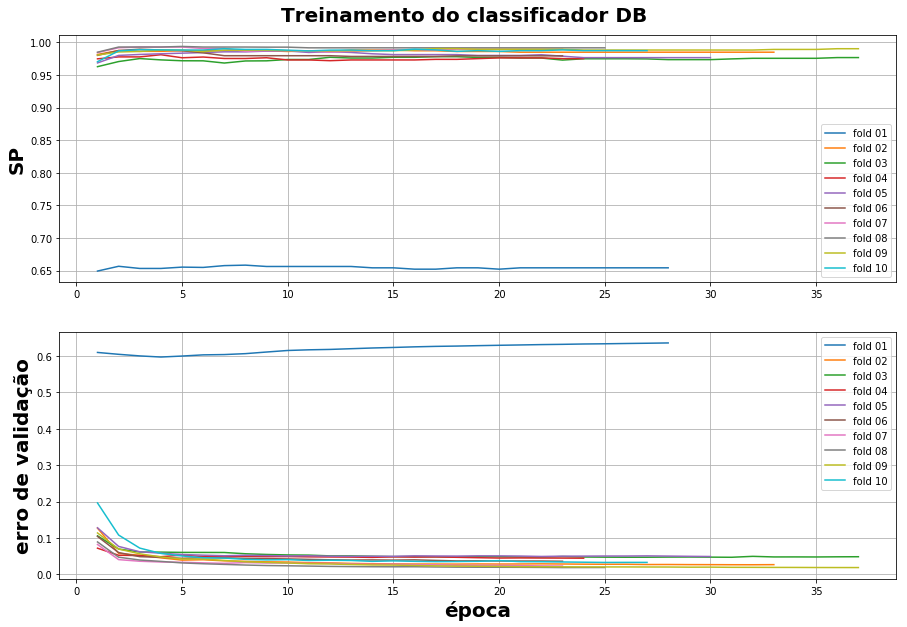

In [78]:
font = 20

fig = plt.figure(figsize=(15,10))
ax = fig.subplots(ncols=1,nrows=2)

for ifold in range(n_folds):
    df = log_folds[ifold]
    df['epoch']=df['epoch'].apply(lambda x:x+1)
    df.plot(x='epoch',y='sp',ax=ax[0])
    df.plot(x='epoch',y='val_loss',ax=ax[1])
    

for iax in ax:
    iax.legend(["fold {0:02d}".format(i+1) for i in range(n_folds)])
    #iax.set_xticks(range(50))
    iax.grid()
    #iax.set_xticks(range(1,50))

plt.suptitle('Treinamento do classificador {}'.format(name),fontsize=font,y=0.92,fontweight='bold')
    
plt.xlabel(u'época',fontsize=font,fontweight='bold')

ax[0].set_ylabel('SP',fontsize=font,fontweight='bold')
ax[0].set_xlabel('',fontsize=font,fontweight='bold')
ax[1].set_ylabel(u'erro de validação',fontsize=font,fontweight='bold')




savefig(plt,folder_folds+'log_{0}_metricSP.png'.format(name))
df.head()

Index([u'index', u'HierarqNet(resultados)_0', u'HierarqNet(valor)_0',
       u'fold_0', u'target_0', u'HierarqNet(resultados)_1',
       u'HierarqNet(valor)_1', u'fold_1', u'target_1',
       u'HierarqNet(resultados)_2', u'HierarqNet(valor)_2', u'fold_2',
       u'target_2', u'HierarqNet(resultados)_3', u'HierarqNet(valor)_3',
       u'fold_3', u'target_3', u'HierarqNet(resultados)_4',
       u'HierarqNet(valor)_4', u'fold_4', u'target_4',
       u'HierarqNet(resultados)_5', u'HierarqNet(valor)_5', u'fold_5',
       u'target_5', u'HierarqNet(resultados)_6', u'HierarqNet(valor)_6',
       u'fold_6', u'target_6', u'HierarqNet(resultados)_7',
       u'HierarqNet(valor)_7', u'fold_7', u'target_7',
       u'HierarqNet(resultados)_8', u'HierarqNet(valor)_8', u'fold_8',
       u'target_8', u'HierarqNet(resultados)_9', u'HierarqNet(valor)_9',
       u'fold_9', u'target_9'],
      dtype='object')
figure was saved in /home/venancio/Workspace/SonarAnalysis/Results/Classification/Hierarq_10_inits_

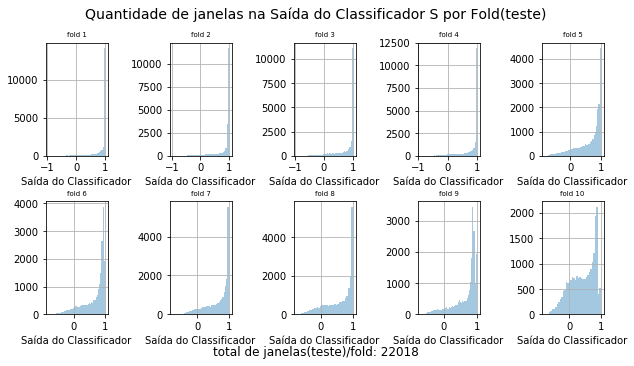

In [24]:
### left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

df = pd.read_csv(file)
print df.columns

fig = plt.figure(figsize=(10,5))
nbins = 20
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.4)
fig.suptitle(u"Quantidade de janelas na Saída do Classificador {0} por Fold(teste)".format(name), fontsize=14)
fig.text(0.5, 0.01, 'total de janelas(teste)/fold: {0}'.format(df[df['fold_{0}'.format(0)]==1].shape[0]), ha='center',fontsize=12,)
for idx in range(10):
    ax = plt.subplot(2,5, idx+1)
    sns.distplot(df[df['fold_{0}'.format(idx)]==1][u'HierarqNet(valor)_{0}'.format(idx)].values,ax=ax,kde=False)#,bins=20)
    ax.grid()
    plt.title('fold {0}'.format(idx+1),fontsize=7)
    #if (idx==0) | (idx==5):
        #plt.ylabel(u'Densidade')
    
    plt.xlabel(u'Saída do Classificador')
    
savefig(fig,folder_folds+'distribution_{0}_10folds.png'.format(name))